In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Library Import

# Importing the necessary lib
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
import os
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer,one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, BatchNormalization,concatenate,Flatten,MaxPool2D,Embedding,Dense,Dropout,MaxPooling2D,Reshape,BatchNormalization
from keras.models import Sequential
from keras import Model,Input
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv1D
import keras.backend as k
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,f1_score,log_loss,recall_score,classification_report
import tensorflow as tf
from keras.callbacks import Callback, EarlyStopping
from time import time
from scipy.sparse import hstack
from tensorflow.python.keras.callbacks import TensorBoard
import pickle
from keras.optimizers import Adam,SGD,RMSprop
from keras.initializers import RandomUniform,he_uniform,glorot_normal
from keras.regularizers import l1
from keras.models import Sequential
from keras.layers import LSTM,BatchNormalization
from tensorflow.keras.layers import Dense, Dropout
import datetime
from prettytable import PrettyTable
from hyperopt import Trials, STATUS_OK, tpe
!pip install hyperas
from hyperas import optim
from hyperas.distributions import choice, uniform,pchoice
from keras.utils import to_categorical
from keras.regularizers import l1
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.6 MB/s eta 0:00:00


In [ ]:
#Reading the train, test and CV data
train = pd.read_csv('/content/drive/MyDrive/TEP Dataset/train.csv')
cv = pd.read_csv("/content/drive/MyDrive/TEP Dataset/cv.csv")
test = pd.read_csv("/content/drive/MyDrive/TEP Dataset/test.csv")
train.head()
print(train.head)

<bound method NDFrame.head of         Unnamed: 0  faultNumber  simulationRun  sample  xmeas_1  xmeas_2  \
0                0          0.0            1.0       1  0.25038   3674.0   
1                1          0.0            1.0       2  0.25109   3659.4   
2                2          0.0            1.0       3  0.25038   3660.3   
3                3          0.0            1.0       4  0.24977   3661.3   
4                4          0.0            1.0       5  0.29405   3679.0   
...            ...          ...            ...     ...      ...      ...   
259995      249995         20.0           25.0     496  0.27620   3616.1   
259996      249996         20.0           25.0     497  0.22570   3755.2   
259997      249997         20.0           25.0     498  0.22522   3780.7   
259998      249998         20.0           25.0     499  0.27818   3632.0   
259999      249999         20.0           25.0     500  0.27917   3661.0   

        xmeas_3  xmeas_4  xmeas_5  xmeas_6  ...   xmv_2  

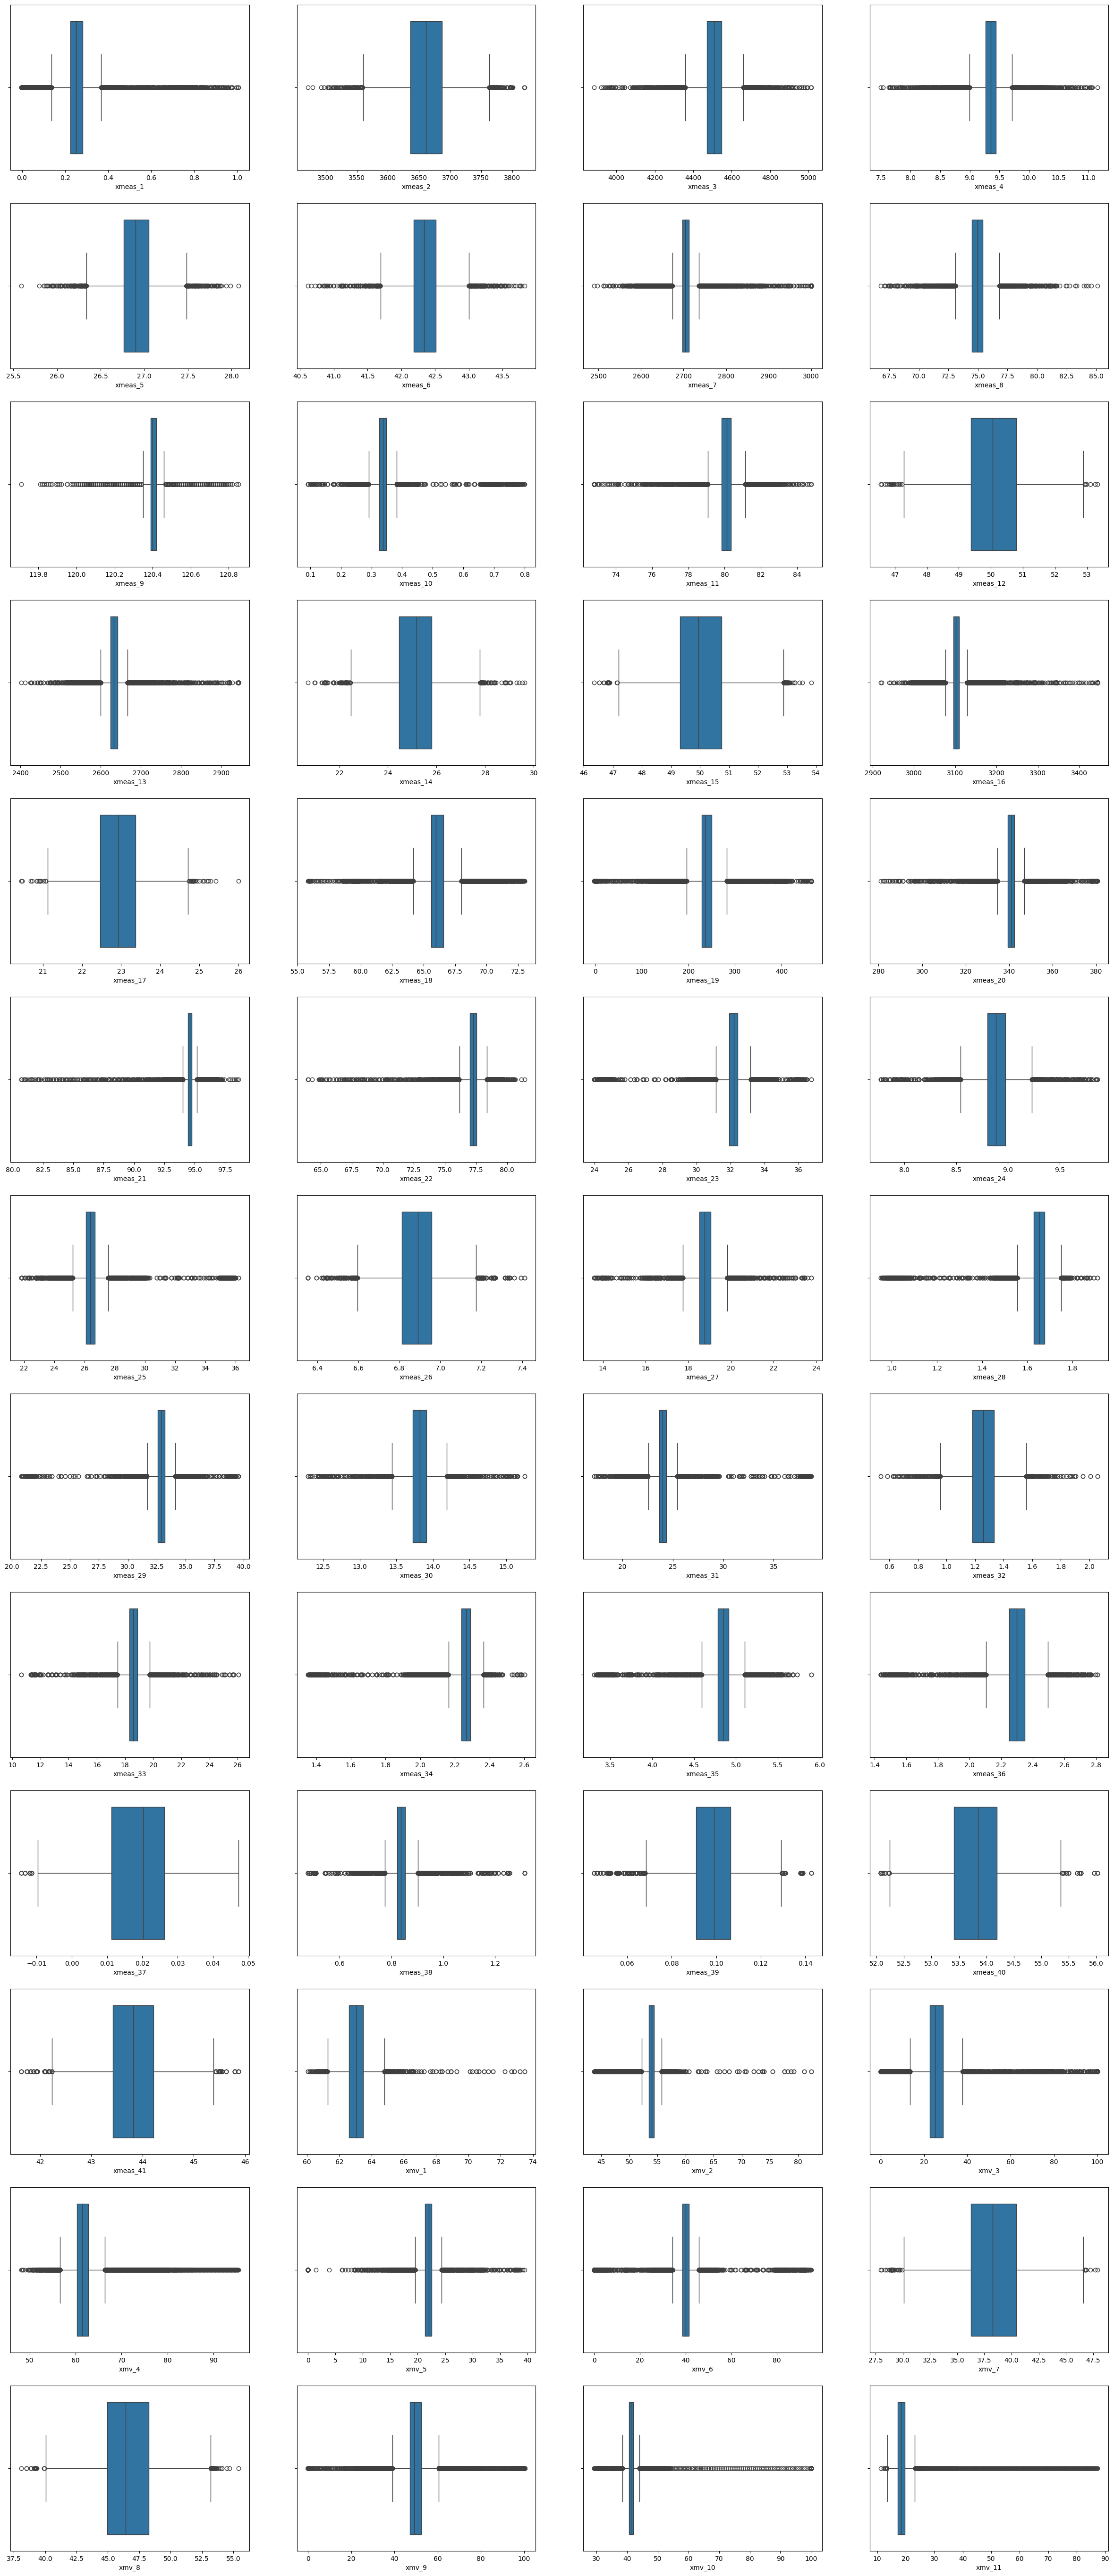

In [ ]:
# Create a box plot for each variable
data = train[train['simulationRun']==1]

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[4:]):   #select all the feature columns to plot
    sns.boxplot(data=data,x=column,ax=ax.ravel()[i])

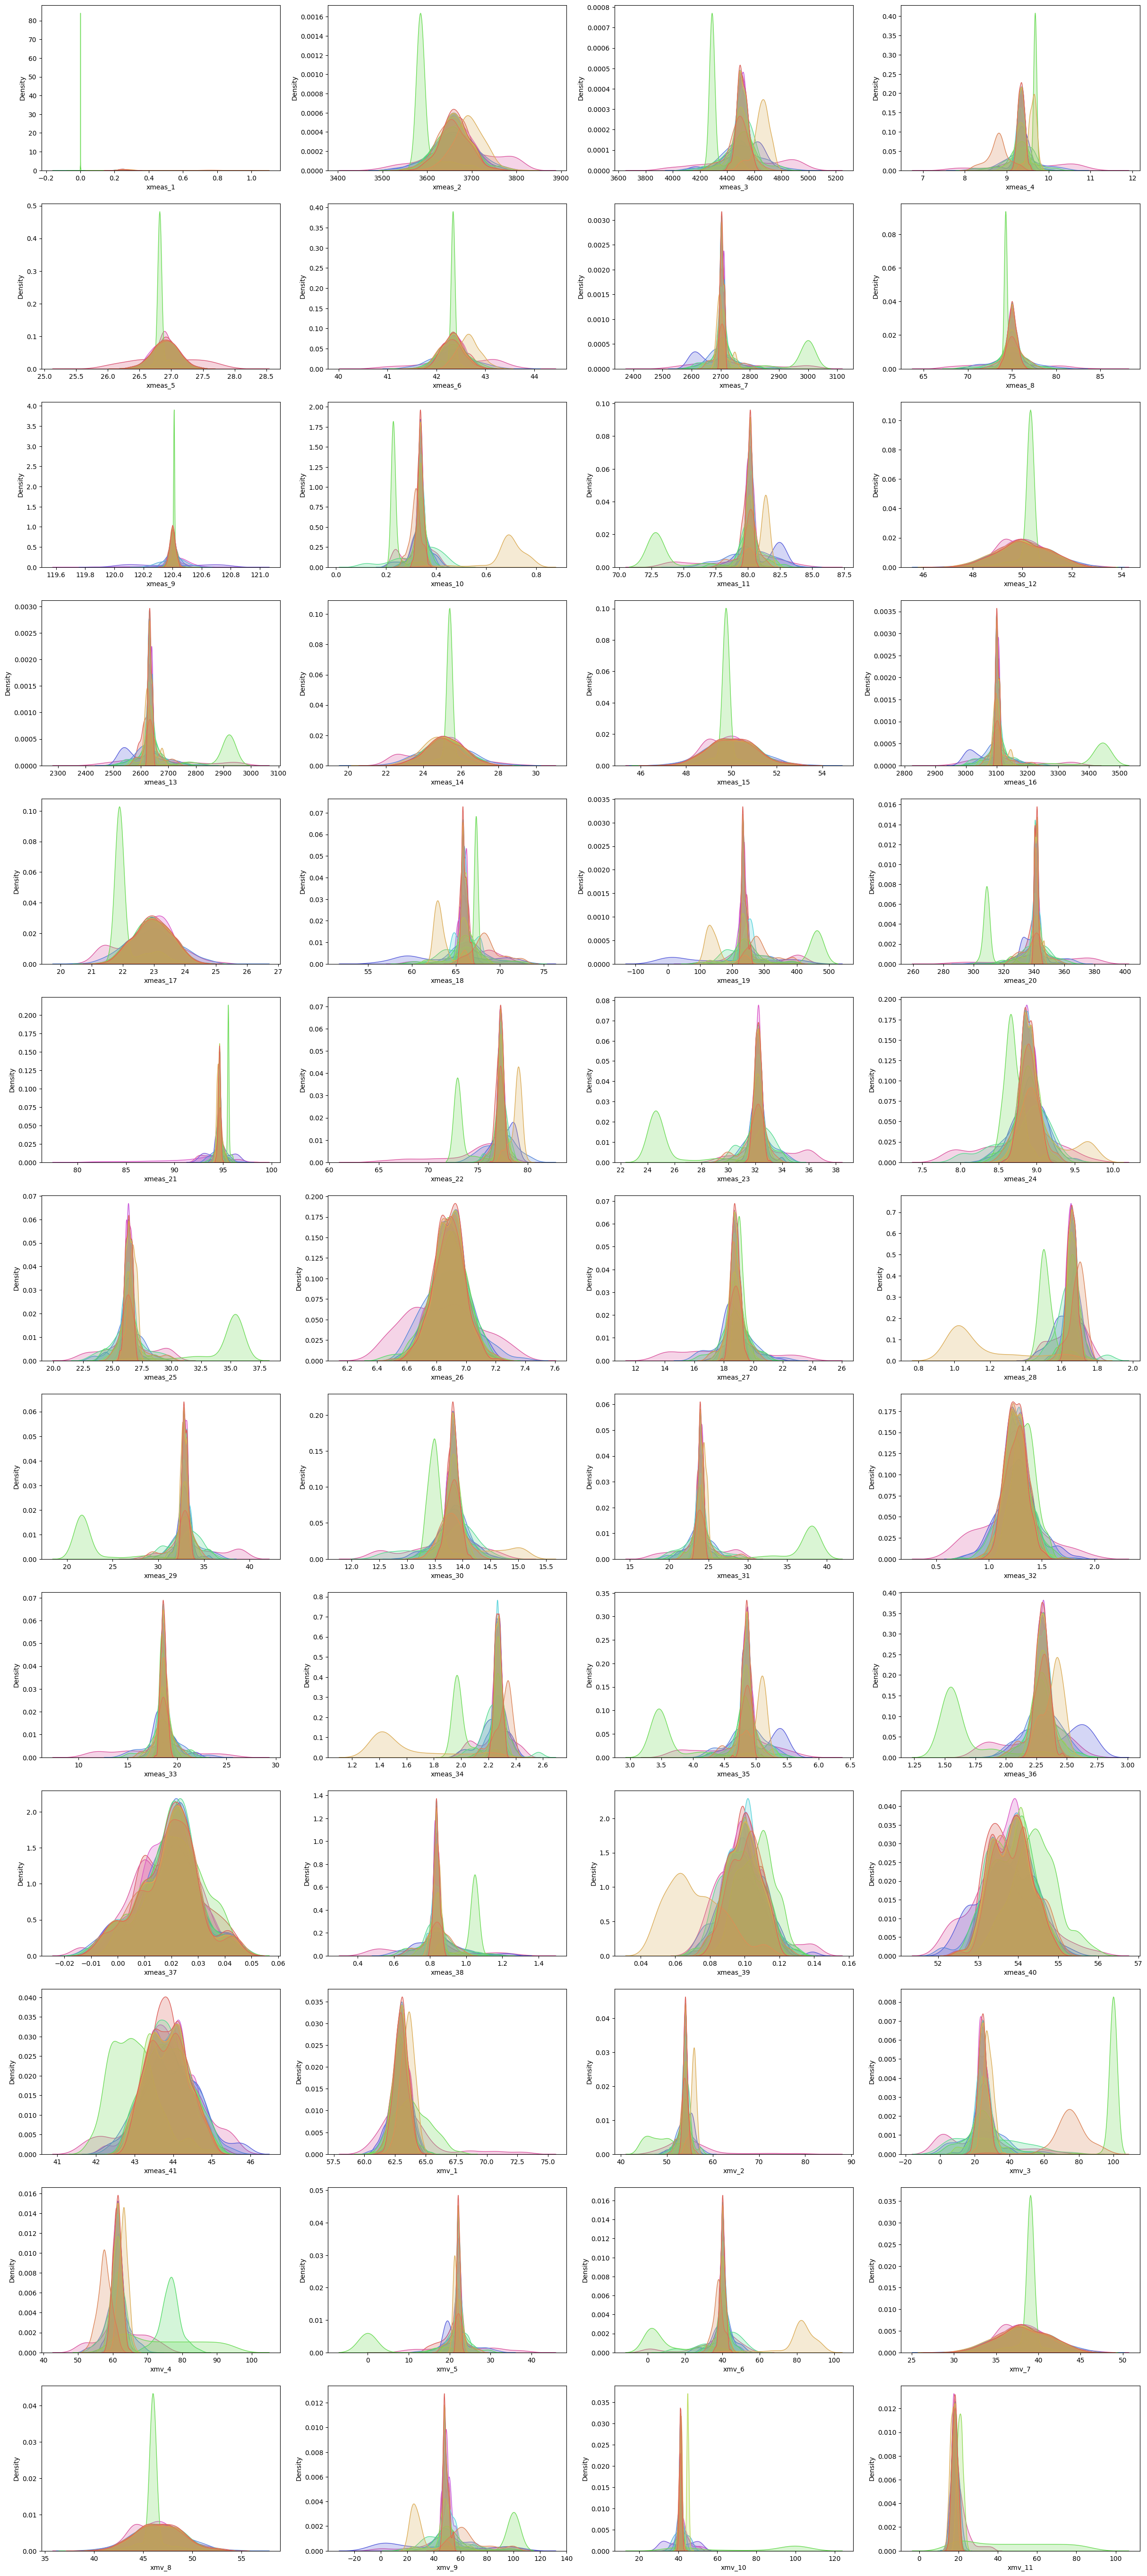

In [ ]:
# KDE plot for each variable

fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[4:]):   #select all the feature columns to plot
    sns.kdeplot(data=data, x=column, hue="faultNumber",palette="hls",ax=ax.ravel()[i],fill=True, legend=False)

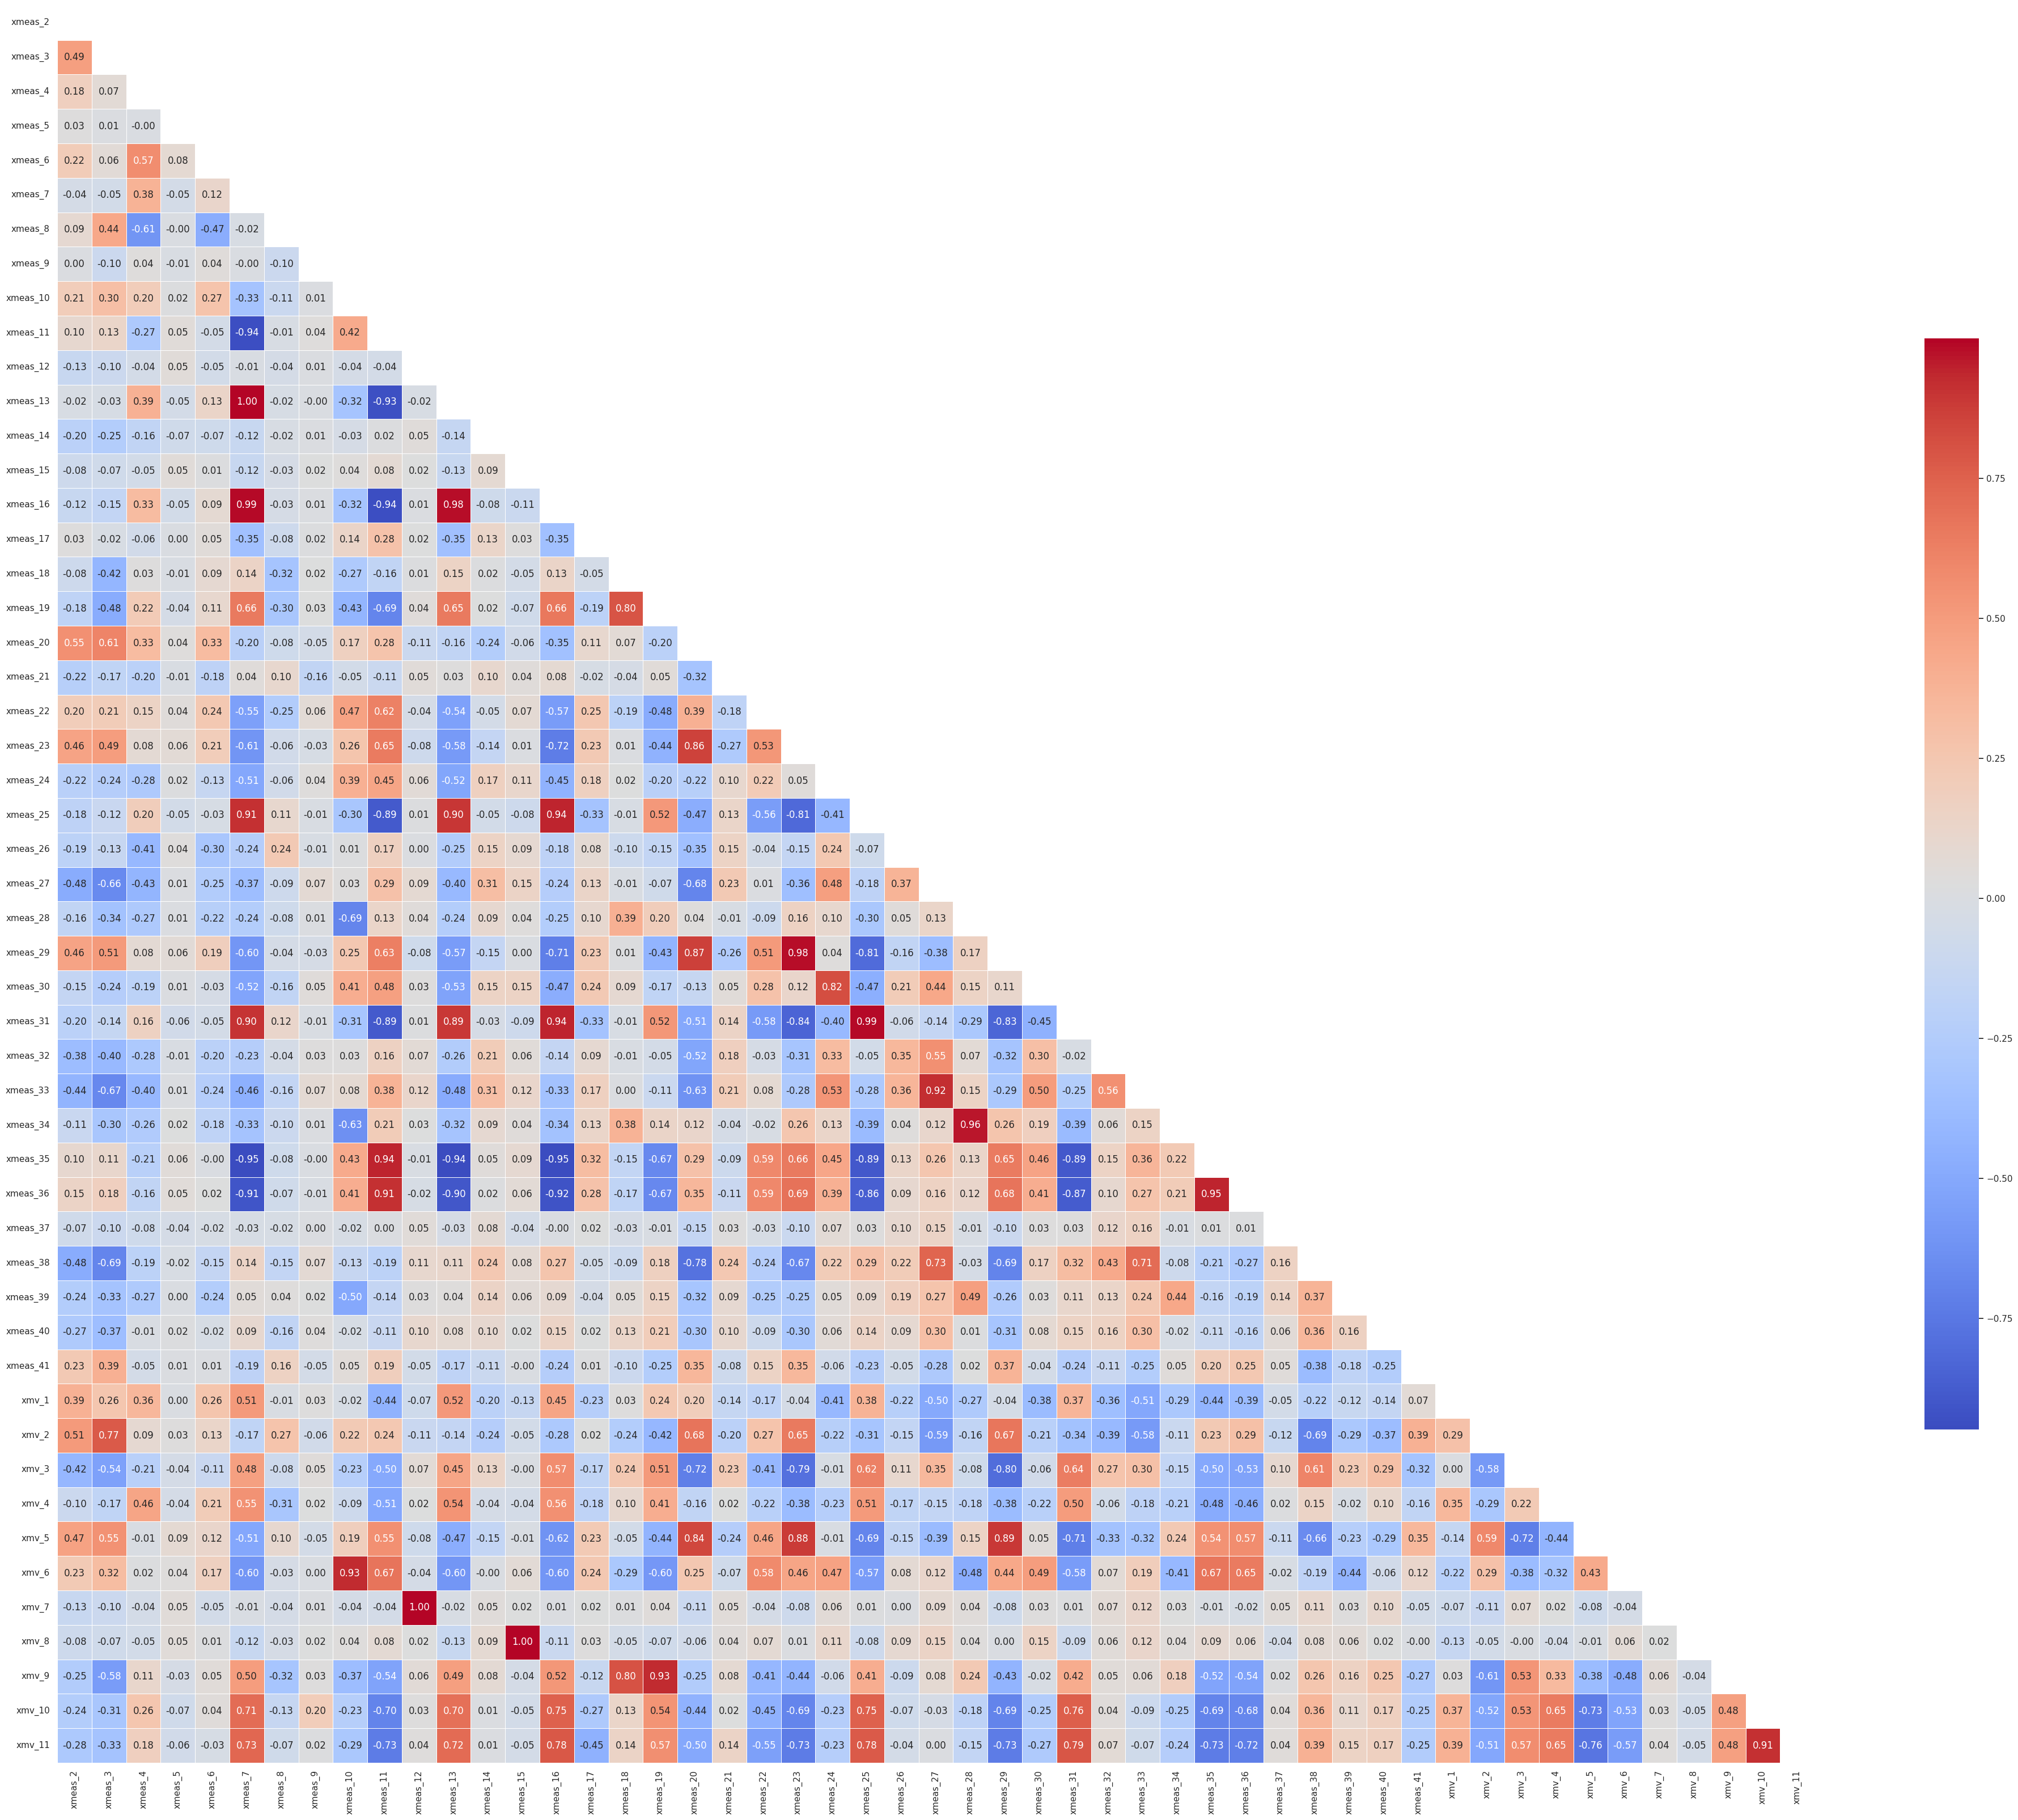

In [ ]:
# Load the data into a pandas DataFrame
data = train[train['simulationRun']==1].iloc[:,5:]

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90) or any(upper_tri[column] < -0.90)]
print(len(to_drop)); print(to_drop)

15
['xmeas_11', 'xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_11']
